In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
import imutils

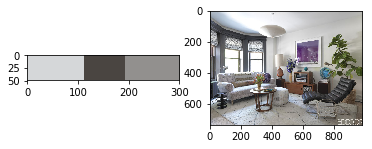

In [4]:
def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

img = cv2.imread("3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_holder = img

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=3) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(bar)
f.add_subplot(1,2,2)
plt.imshow(img_holder)
plt.show(block=True)

# track people 
# need to work on multiple images


In [5]:
image_list = []
image_name = []

#read images
for filename in glob.glob('*.jpg'):
    im = cv2.imread(filename)        # cv2.imread gets BGR image
    b,g,r = cv2.split(im)            # get b,g,r convert to RGB
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    image_list.append(rgb_img)
    image_name.append(filename)

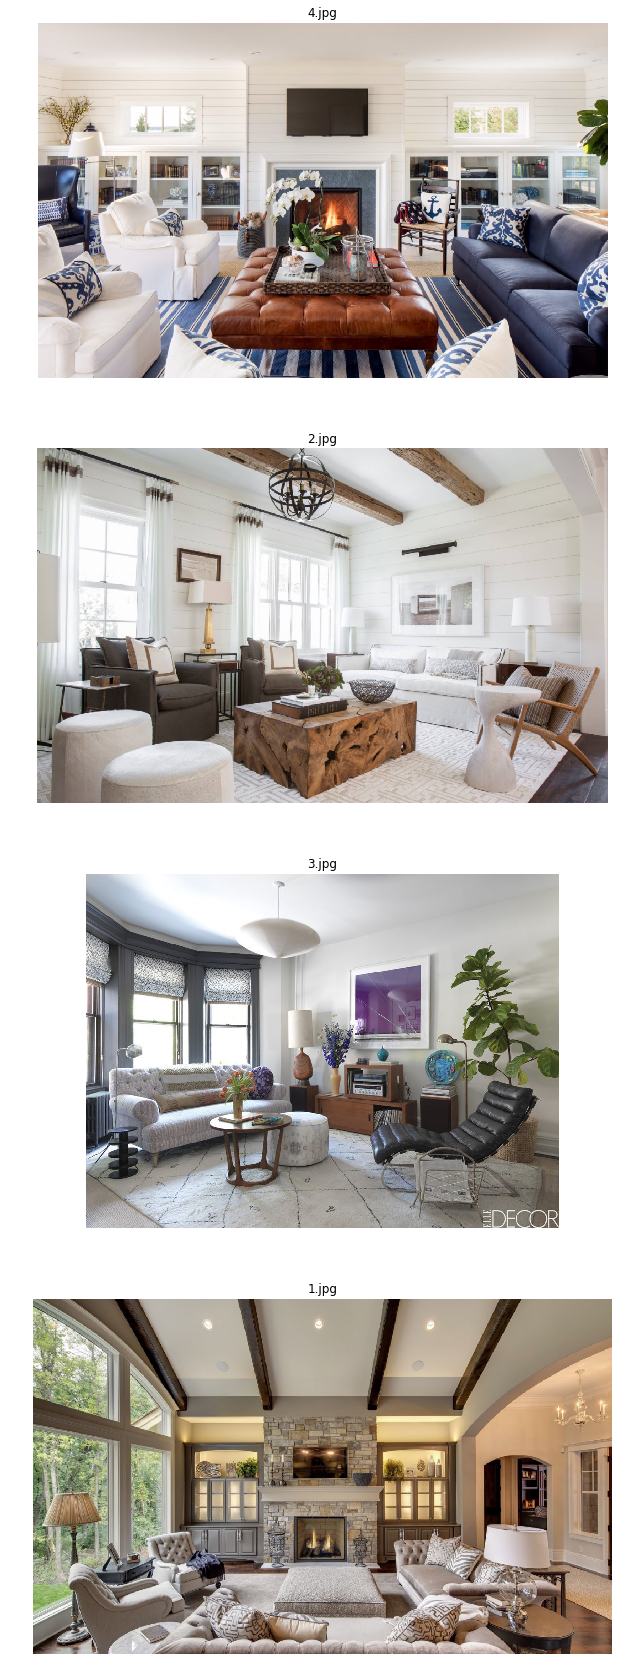

In [11]:

# display images
fig, axs = plt.subplots(len(image_list), 1, figsize=(60,30))
fig.subplots_adjust(hspace= .2, wspace = .001)
axs = axs.ravel()
for i in range(len(image_list)):
    image = image_list[i]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(image_name[i])